In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter


settings = Settings(name='test_full0.5')
settings.replicates = 3
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

# VDX = ValDXer(settings)


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55


In [2]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer


In [3]:
def pre_process_main():
    # BPTI data
    expt_name = 'Experimental'
    test_name = "MD_Simulated"

    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"
    expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

    os.listdir(expt_dir)

    segs_name = "BPTI_residue_segs.txt"
    segs_path = os.path.join(expt_dir, segs_name)

    hdx_name = "BPTI_expt_dfracs.dat"
    hdx_path = os.path.join(expt_dir, hdx_name)
    print(hdx_path)

    rates_name = "BPTI_Intrinsic_rates.dat"
    rates_path = os.path.join(expt_dir, rates_name)
    sim_name = 'BPTI_MD'

    sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

    os.listdir(sim_dir)

    md_reps = 1
    rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

    top_name = "bpti_5pti_eq6_protonly.gro"

    top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

    traj_name = "bpti_5pti_reimg_protonly.xtc"

    traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

    print(top_path)
    print(traj_paths)


    small_traj_name = traj_name.replace(".xtc","_small.xtc")
    small_traj_path = os.path.join(sim_dir, small_traj_name)

    u = mda.Universe(top_path, traj_paths)

    
        
    with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
        for ts in u.trajectory[:5]:
                W.write(u.atoms)

    traj_paths = [small_traj_path]
    

    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [4]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


In [5]:
# def run_split_test(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode, system])

#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name naiverandom_r_BPTITtut already exists. Attempting to change name to naiverandom_r_BPTITtut0
Experiment name naiverandom_r_BPTITtut already exists. Attempting to change name to naiverandom_r_BPTITtut1
Experiment name naiverandom_r_BPTITtut already exists. Attempting to change name to naiverandom_r_BPTITtut2
Experiment name naiverandom_r_BPTITtut already exists. Attempting to change name to naiverandom_r_BPTITtut3
Experiment name naiverandom_r_BPTITtut already exists. Attempting to change name to naiverandom_r_BPTITtut4
Experiment name naiverandom_r_BPTITtut already exists. Attempting to change name to naiverandom_r_BPTITtut5
Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 H

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Proje

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_1/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
         58883 function calls (58806 primitive calls) in 0.063 s

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Proje

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_2/reweighting_gamma_2x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         58883 function calls (58806 primitive calls) in 0.071 s

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/calc_hdx_train_MD_Simulated_3.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/out__train_MD_Simulated_3 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/out__train_MD_Simulated_3Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_3 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Proje

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/naiverandom_r_BPTITtut5/train_MD_Simulated_3/reweighting_gamma_4x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         55993 function calls (55916 primitive calls) in 0.058 s

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

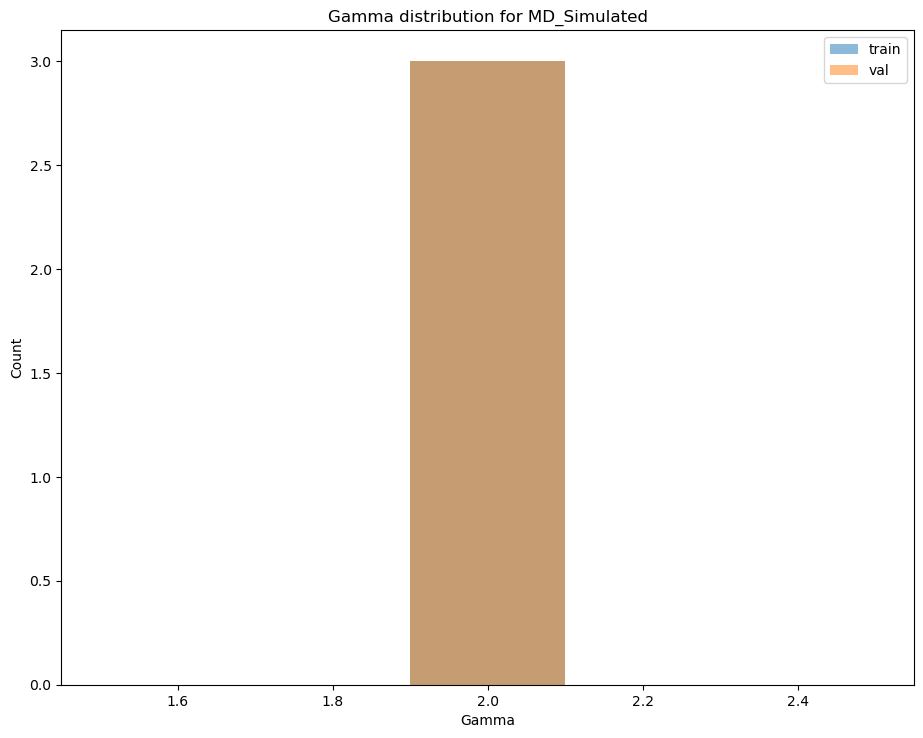

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plot_dfracs_compare
        0.167       1.0      10.0  120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960    1.0        0         Experimental   
1    0.090390  0.432930  0.996560    1.0        1         Experimental   
2    0.026650  0.149330  0.801570    1.0        2         Experimental   
3    0.186800  0.710100  1.000000    1.0        3         Experimental   
4    0.998800  1.000000  1.000000    1.0        4         Experimental   
..        ...       ...       ...    ...      ...                  ...   
282  0.256593  0.645329  0.989142    1.0       36  test_MD_Simulated_3   
283  0.722582  0.986246  1.000000    1.0       37  test_MD_Simulated_3   
284  0.995371  1.000000  1.000000    1.0       38  test_MD_Simulated_3   
285  0.635613  0.926757  1.000000    1.0       39  test_MD_Simulated_3   
286  0.262669  0.838116  1

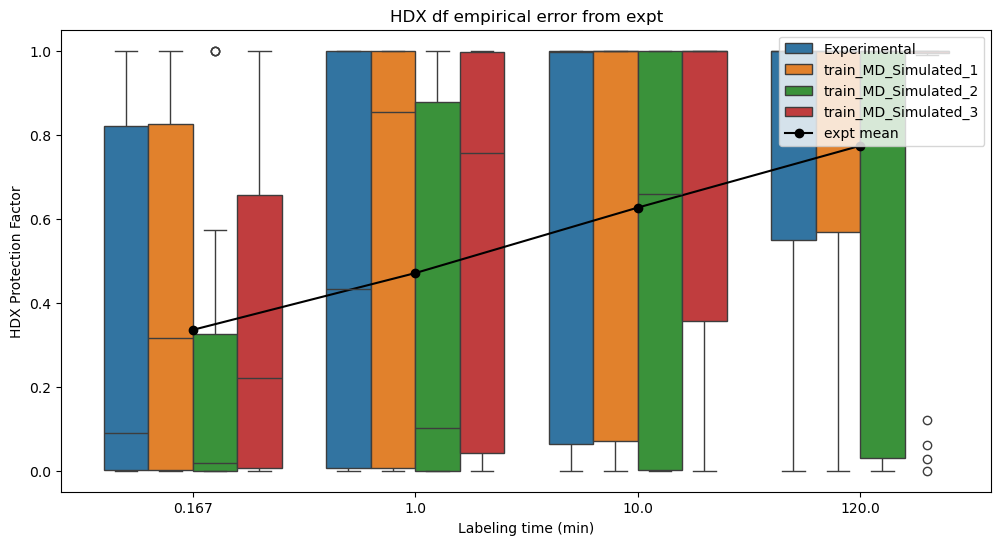

plot_dfracs_compare
        0.167       1.0      10.0  120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960    1.0        0         Experimental   
1    0.090390  0.432930  0.996560    1.0        1         Experimental   
2    0.026650  0.149330  0.801570    1.0        2         Experimental   
3    0.186800  0.710100  1.000000    1.0        3         Experimental   
4    0.998800  1.000000  1.000000    1.0        4         Experimental   
..        ...       ...       ...    ...      ...                  ...   
282  0.256593  0.645329  0.989142    1.0       36  test_MD_Simulated_3   
283  0.722582  0.986246  1.000000    1.0       37  test_MD_Simulated_3   
284  0.995371  1.000000  1.000000    1.0       38  test_MD_Simulated_3   
285  0.635613  0.926757  1.000000    1.0       39  test_MD_Simulated_3   
286  0.262669  0.838116  1.000000    1.0       40  test_MD_Simulated_3   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2       Na

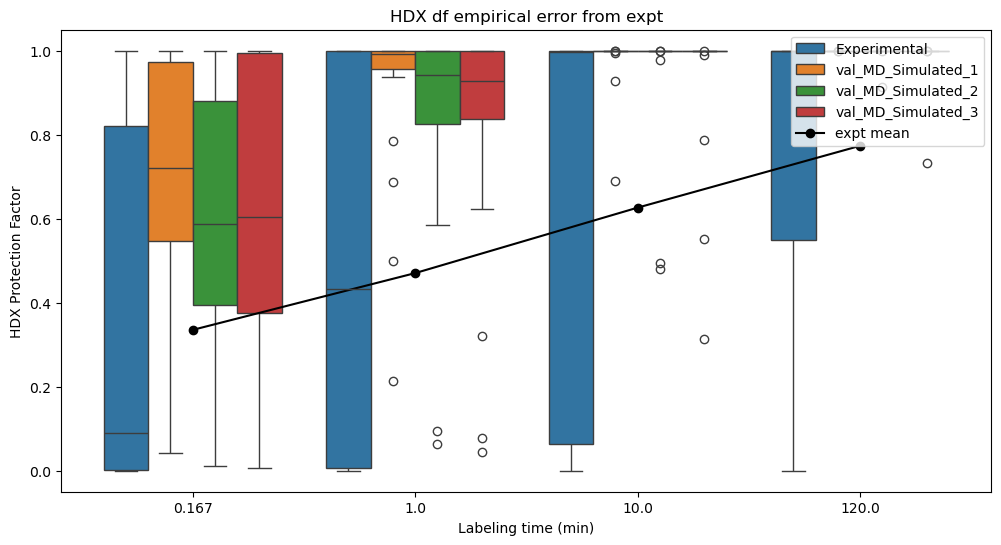

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [14, 5, 20, 26, 6, 24, 7, 29, 22, 38, 9, 13, 10, 31, 36, 8, 12, 37, 19, 40]
val_rep_peptides [0, 1, 2, 3, 4, 11, 15, 16, 17, 18, 21, 23, 25, 27, 28, 30, 32, 33, 34, 35, 39]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

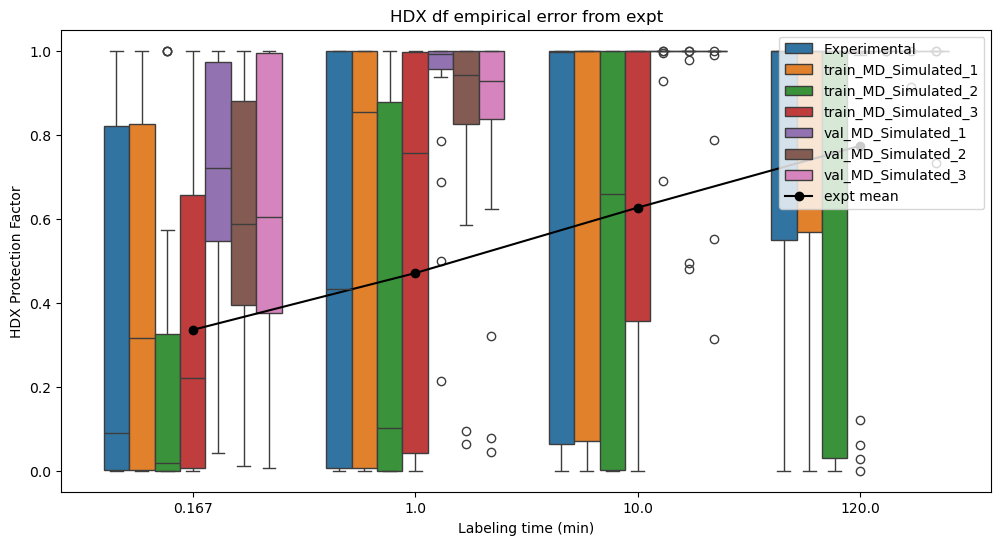

plotting paired errors
        0.167       1.0      10.0  120.0  peptide           calc_name  ResStr  \
0    0.156690  0.639570  0.999960    1.0        0        Experimental     NaN   
1    0.090390  0.432930  0.996560    1.0        1        Experimental     NaN   
2    0.026650  0.149330  0.801570    1.0        2        Experimental     NaN   
3    0.186800  0.710100  1.000000    1.0        3        Experimental     NaN   
4    0.998800  1.000000  1.000000    1.0        4        Experimental     NaN   
..        ...       ...       ...    ...      ...                 ...     ...   
159  0.209232  0.623396  0.989142    1.0       35  val_MD_Simulated_3    50.0   
160  0.722582  0.986246  1.000000    1.0       37  val_MD_Simulated_3    52.0   
161  0.995371  1.000000  1.000000    1.0       38  val_MD_Simulated_3    53.0   
162  0.635613  0.926757  1.000000    1.0       39  val_MD_Simulated_3    54.0   
163  0.262669  0.838116  1.000000    1.0       40  val_MD_Simulated_3    55.0   

    

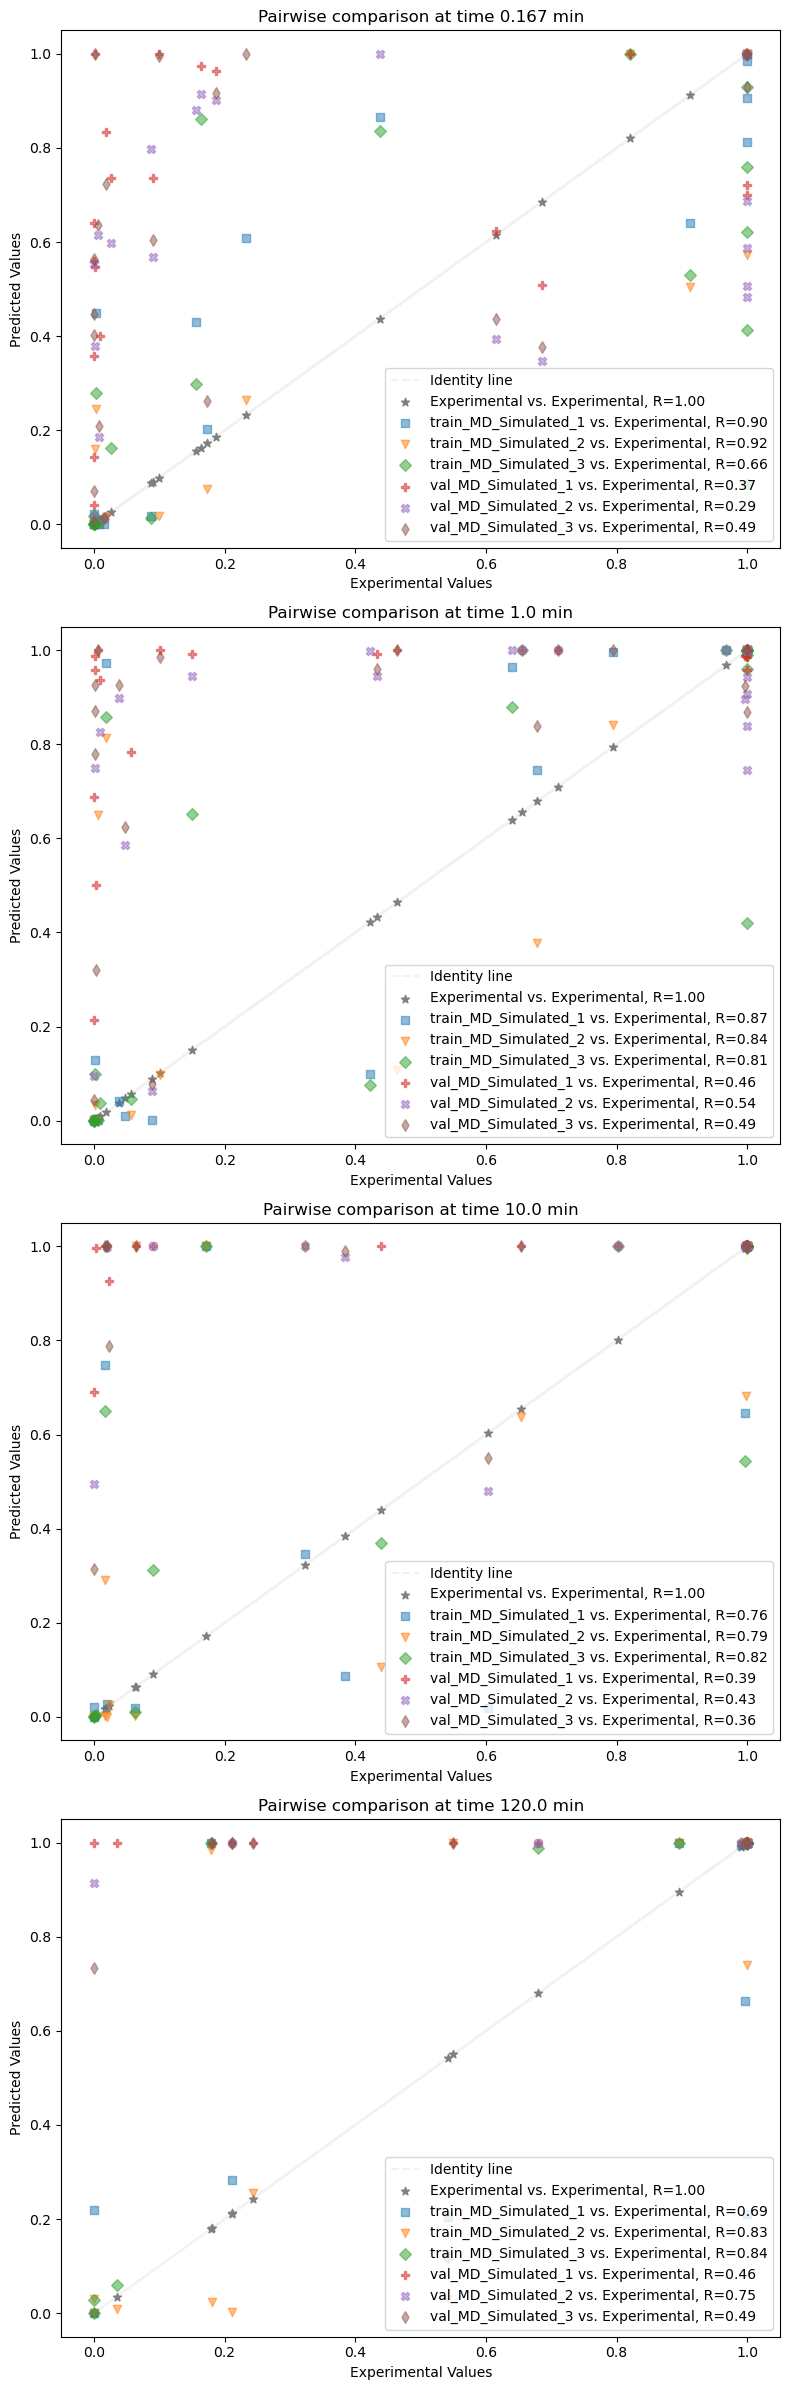

plotting paired trainval agreement
        0.167       1.0      10.0  120.0  peptide           calc_name  ResStr  \
0    0.156690  0.639570  0.999960    1.0        0        Experimental     NaN   
1    0.090390  0.432930  0.996560    1.0        1        Experimental     NaN   
2    0.026650  0.149330  0.801570    1.0        2        Experimental     NaN   
3    0.186800  0.710100  1.000000    1.0        3        Experimental     NaN   
4    0.998800  1.000000  1.000000    1.0        4        Experimental     NaN   
..        ...       ...       ...    ...      ...                 ...     ...   
159  0.209232  0.623396  0.989142    1.0       35  val_MD_Simulated_3    50.0   
160  0.722582  0.986246  1.000000    1.0       37  val_MD_Simulated_3    52.0   
161  0.995371  1.000000  1.000000    1.0       38  val_MD_Simulated_3    53.0   
162  0.635613  0.926757  1.000000    1.0       39  val_MD_Simulated_3    54.0   
163  0.262669  0.838116  1.000000    1.0       40  val_MD_Simulated_3    5

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train

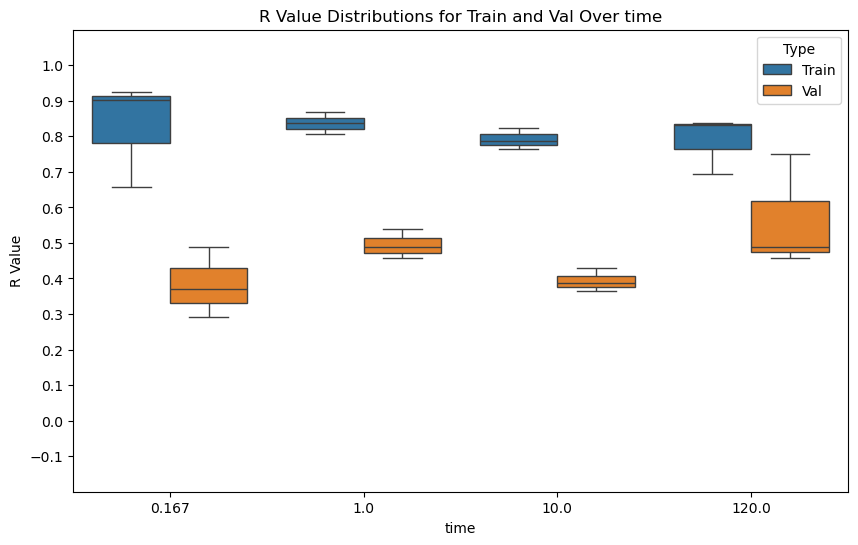

nan_df
        0.167       1.0      10.0    120.0  peptide             calc_name  \
0    0.000320  0.001910  0.018920  0.20485       24  train_MD_Simulated_1   
1    0.000340  0.002060  0.020410  0.21917       13  train_MD_Simulated_1   
2    0.022770  0.128810  0.748170  1.00000        8  train_MD_Simulated_1   
3    0.000330  0.001970  0.019480  0.21029       25  train_MD_Simulated_1   
4    0.999980  1.000000  1.000000  1.00000        4  train_MD_Simulated_1   
..        ...       ...       ...      ...      ...                   ...   
241  0.209232  0.623396  0.989142  1.00000       35    val_MD_Simulated_3   
242  0.722582  0.986246  1.000000  1.00000       37    val_MD_Simulated_3   
243  0.995371  1.000000  1.000000  1.00000       38    val_MD_Simulated_3   
244  0.635613  0.926757  1.000000  1.00000       39    val_MD_Simulated_3   
245  0.262669  0.838116  1.000000  1.00000       40    val_MD_Simulated_3   

     ResStr  ResEnd                                               pa

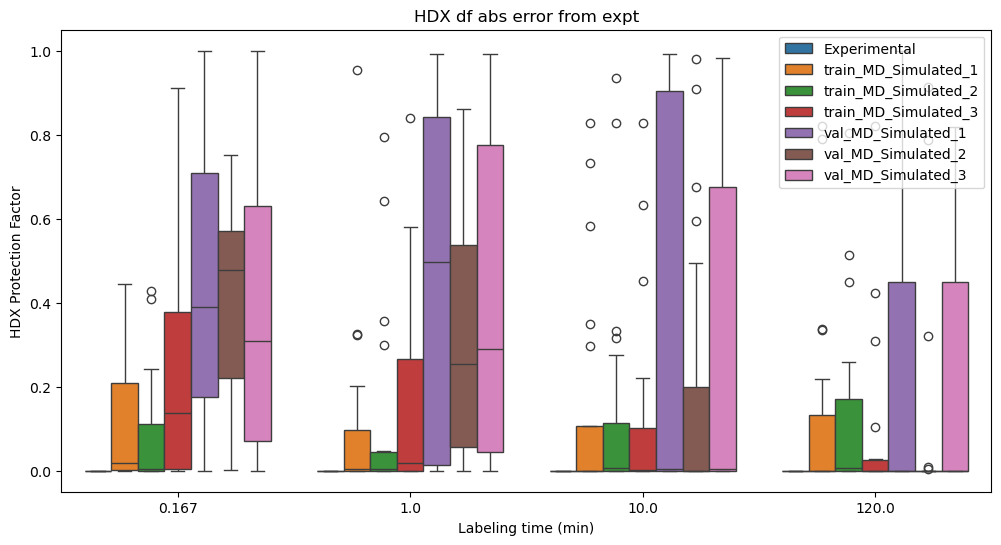

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.00032  0.00191  0.01892  0.20485       24  train_MD_Simulated_1   
1    0.00034  0.00206  0.02041  0.21917       13  train_MD_Simulated_1   
2    0.02277  0.12881  0.74817  1.00000        8  train_MD_Simulated_1   
3    0.00033  0.00197  0.01948  0.21029       25  train_MD_Simulated_1   
4    0.99998  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
282  0.00963  0.05627  0.43963  0.99904       36          Experimental   
283  0.01757  0.10068  0.65396  1.00000       37          Experimental   
284  0.09888  0.46390  0.99804  1.00000       38          Experimental   
285  0.00650  0.03831  0.32339  0.99079       39          Experimental   
286  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

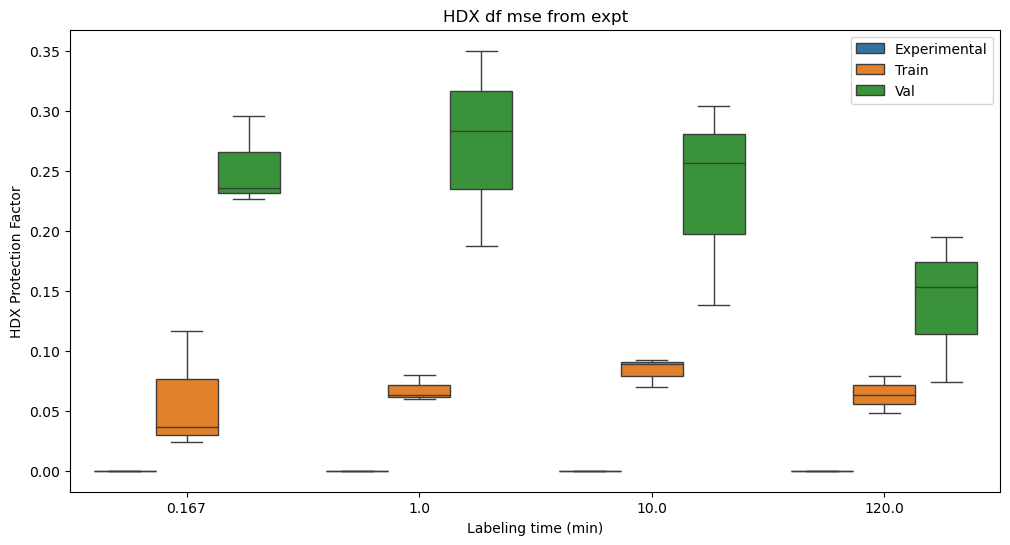

Saving experiment to:  logs/naiverandom_r_BPTITtut5_1707957552.pkl


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name NC_Termini_s_BPTITtut already exists. Attempting to change name to NC_Termini_s_BPTITtut0
Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False   

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_4x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         58898 function calls (58821 primitive calls) in 0.065 secon

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/R

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_5x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_4x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         58883 function calls (58806 primitive calls) in 0.061 secon

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/calc_hdx_train_MD_Simulated_3.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/out__train_MD_Simulated_3 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/R

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/out__train_MD_Simulated_3Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_3 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/reweighting_gamma_5x10^0/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/reweighting_gamma_4x10^0

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/reweighting_gamma_3x10^0/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/NC_Termini_s_BPTITtut0/train_MD_Simulated_3/reweighting_gamma_2x10^0

Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         58898 function calls (58821 primitive calls) in 0.065 secon

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

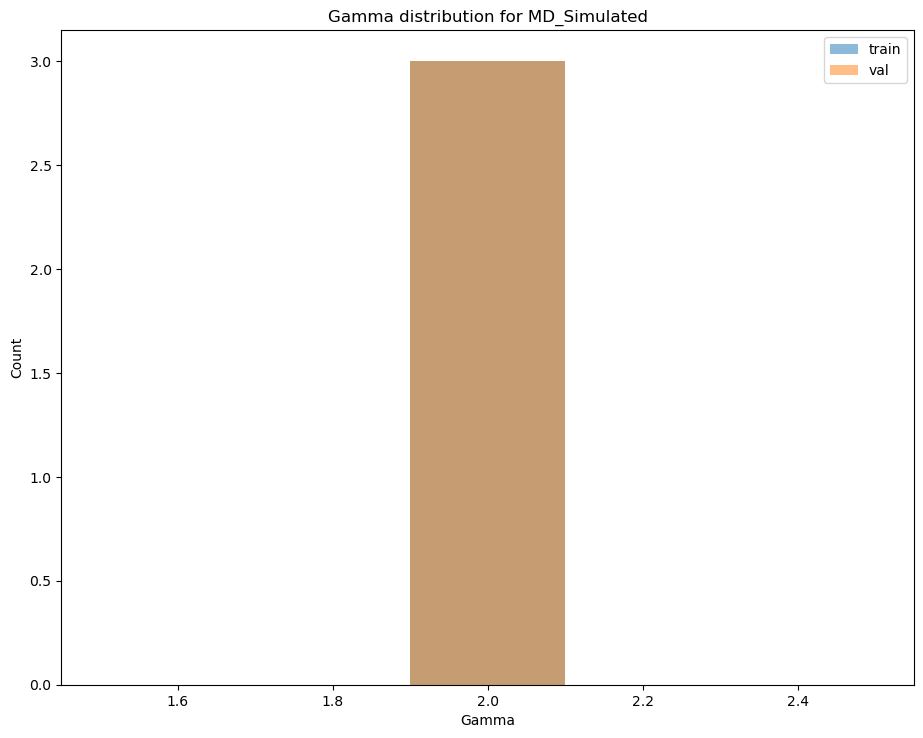

['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
plot_dfracs_compare
        0.167       1.0      10.0  120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960    1.0        0         Experimental   
1    0.090390  0.432930  0.996560    1.0        1         Experimental   
2    0.026650  0.149330  0.801570    1.0        2         Experimental   
3    0.186800  0.710100  1.000000    1.0        3         Experimental   
4    0.998800  1.000000  1.000000    1.0        4         Experimental   
..        ...       ...       ...    ...      ...                  ...   
282  0.406037  0.789994  0.999917    1.0       36  test_MD_Simulated_3   
283  0.838123  0.999422  1.000000    1.0       37  test_MD_Simulated_3   
284  0.999587  1.000000  1.000000    1.0       38  test_MD_Simulated_3   
285  0.746881  0.991541  1.000000    1.0       39  test_MD_Simulated_3   
286  0.466795  0.975941  1

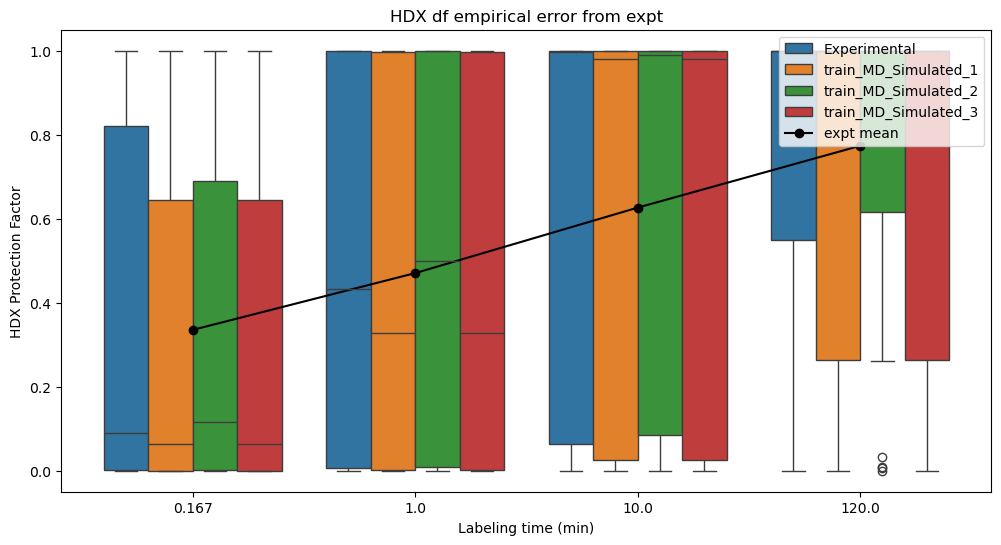

plot_dfracs_compare
        0.167       1.0      10.0  120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960    1.0        0         Experimental   
1    0.090390  0.432930  0.996560    1.0        1         Experimental   
2    0.026650  0.149330  0.801570    1.0        2         Experimental   
3    0.186800  0.710100  1.000000    1.0        3         Experimental   
4    0.998800  1.000000  1.000000    1.0        4         Experimental   
..        ...       ...       ...    ...      ...                  ...   
282  0.406037  0.789994  0.999917    1.0       36  test_MD_Simulated_3   
283  0.838123  0.999422  1.000000    1.0       37  test_MD_Simulated_3   
284  0.999587  1.000000  1.000000    1.0       38  test_MD_Simulated_3   
285  0.746881  0.991541  1.000000    1.0       39  test_MD_Simulated_3   
286  0.466795  0.975941  1.000000    1.0       40  test_MD_Simulated_3   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2       Na

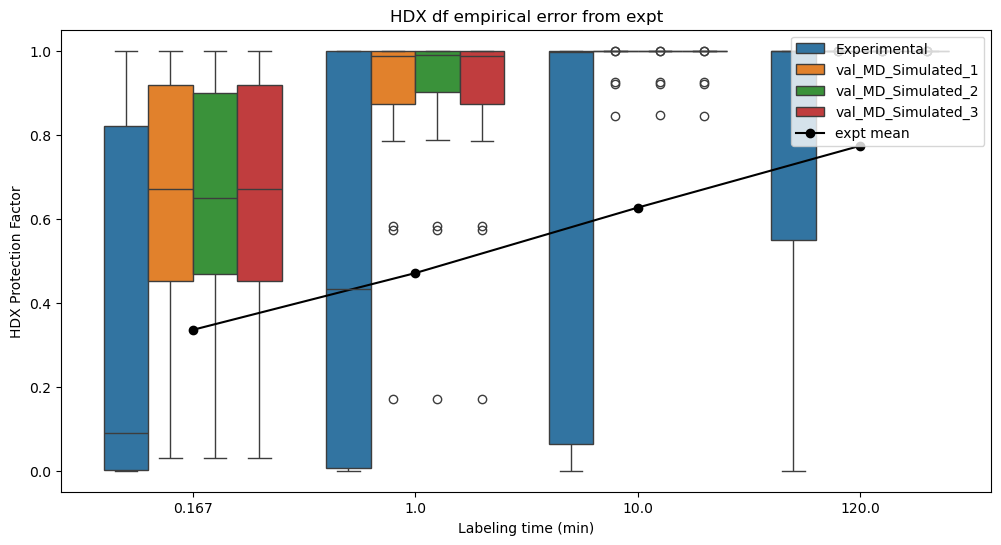

Restoring trainval peptide numbers
train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2', 'train_MD_Simulated_3']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2', 'val_MD_Simulated_3']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2', 'test_MD_Simulated_3']
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
val_rep_peptides [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
val_rep_peptides [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

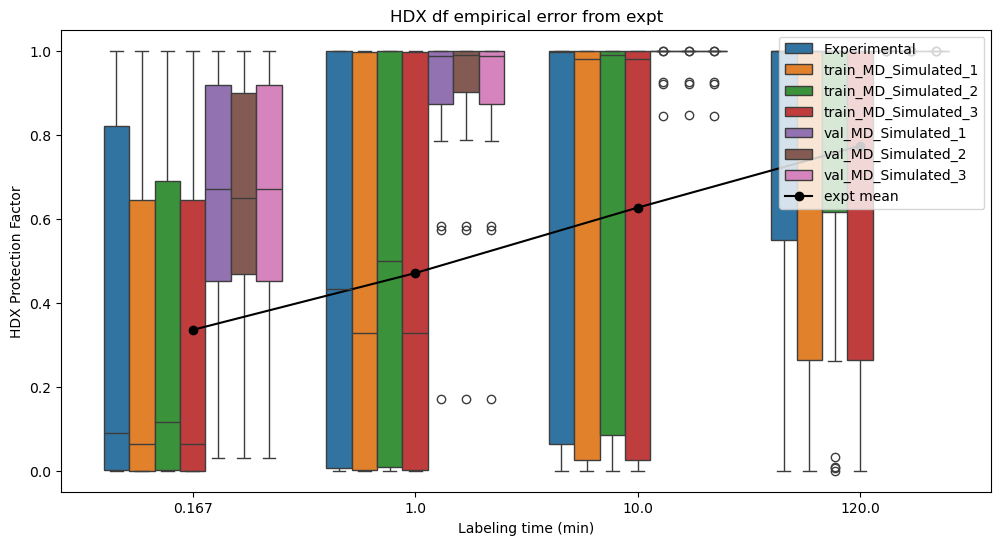

plotting paired errors
        0.167       1.0      10.0  120.0  peptide           calc_name  ResStr  \
0    0.156690  0.639570  0.999960    1.0        0        Experimental     NaN   
1    0.090390  0.432930  0.996560    1.0        1        Experimental     NaN   
2    0.026650  0.149330  0.801570    1.0        2        Experimental     NaN   
3    0.186800  0.710100  1.000000    1.0        3        Experimental     NaN   
4    0.998800  1.000000  1.000000    1.0        4        Experimental     NaN   
..        ...       ...       ...    ...      ...                 ...     ...   
159  0.406037  0.789994  0.999917    1.0       36  val_MD_Simulated_3    51.0   
160  0.838123  0.999422  1.000000    1.0       37  val_MD_Simulated_3    52.0   
161  0.999587  1.000000  1.000000    1.0       38  val_MD_Simulated_3    53.0   
162  0.746881  0.991541  1.000000    1.0       39  val_MD_Simulated_3    54.0   
163  0.466795  0.975941  1.000000    1.0       40  val_MD_Simulated_3    55.0   

    

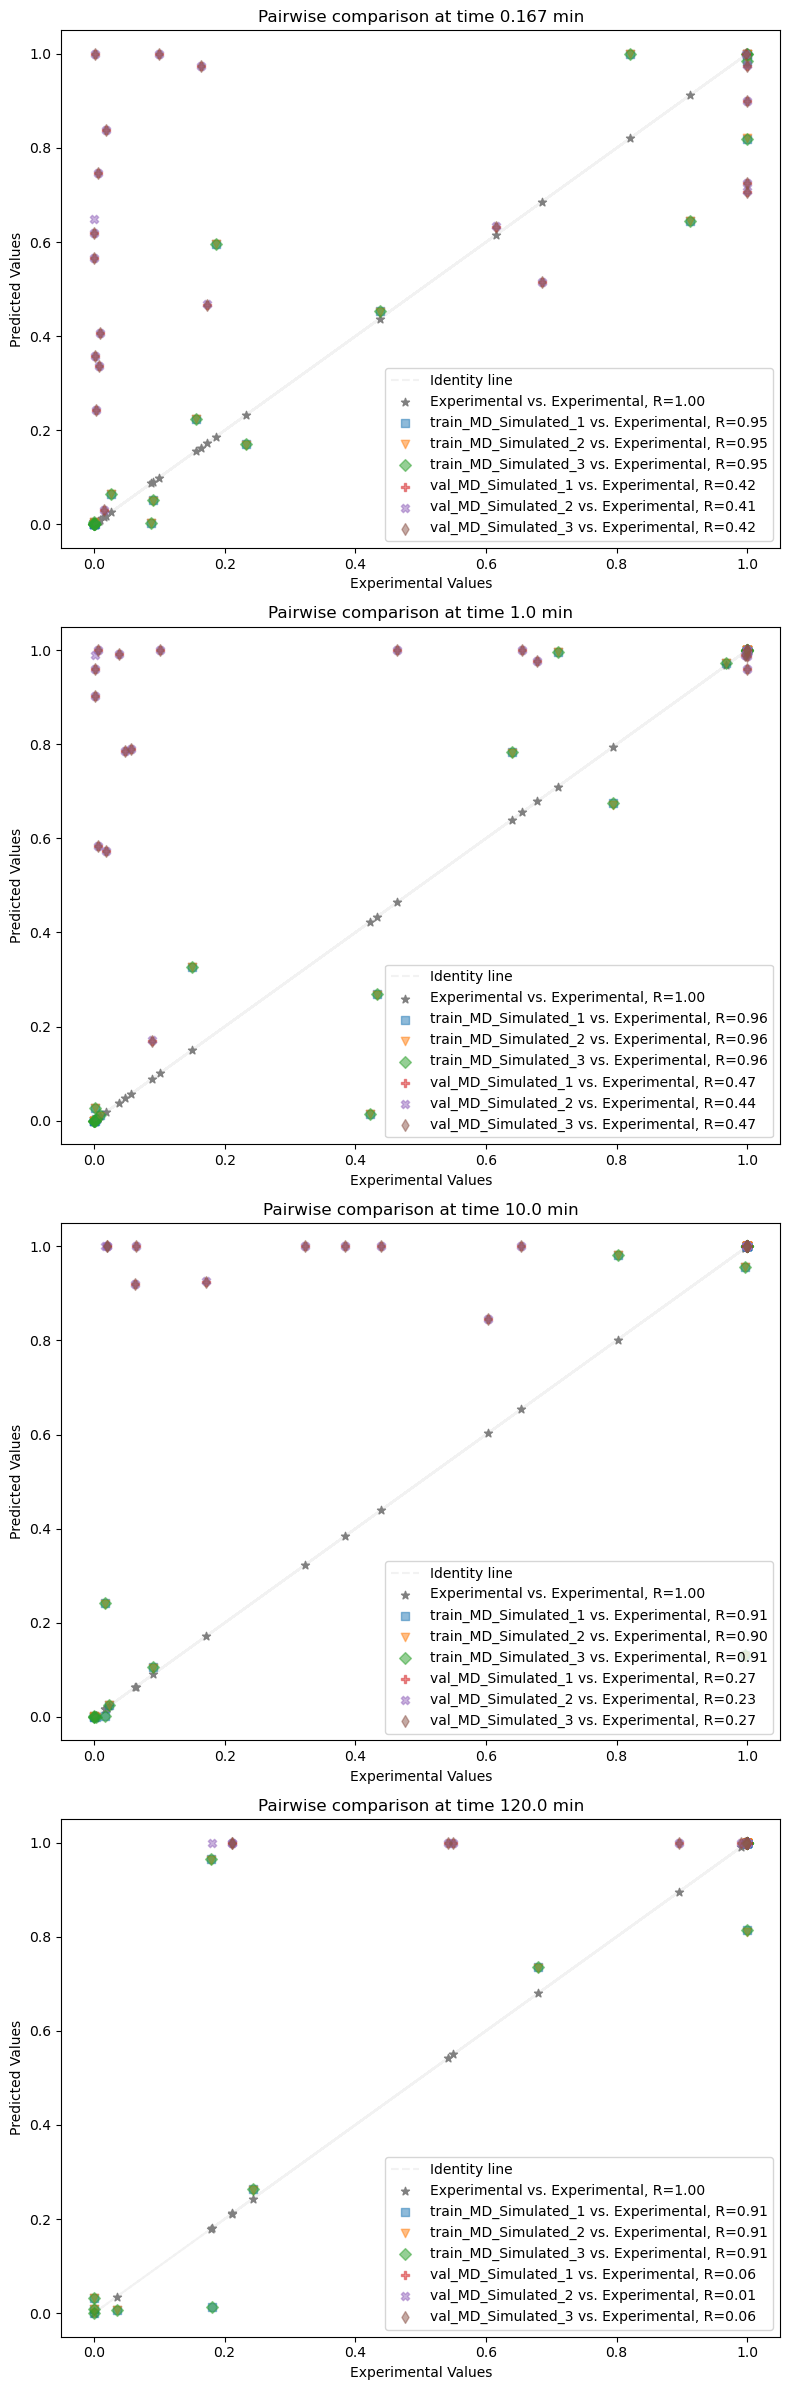

plotting paired trainval agreement
        0.167       1.0      10.0  120.0  peptide           calc_name  ResStr  \
0    0.156690  0.639570  0.999960    1.0        0        Experimental     NaN   
1    0.090390  0.432930  0.996560    1.0        1        Experimental     NaN   
2    0.026650  0.149330  0.801570    1.0        2        Experimental     NaN   
3    0.186800  0.710100  1.000000    1.0        3        Experimental     NaN   
4    0.998800  1.000000  1.000000    1.0        4        Experimental     NaN   
..        ...       ...       ...    ...      ...                 ...     ...   
159  0.406037  0.789994  0.999917    1.0       36  val_MD_Simulated_3    51.0   
160  0.838123  0.999422  1.000000    1.0       37  val_MD_Simulated_3    52.0   
161  0.999587  1.000000  1.000000    1.0       38  val_MD_Simulated_3    53.0   
162  0.746881  0.991541  1.000000    1.0       39  val_MD_Simulated_3    54.0   
163  0.466795  0.975941  1.000000    1.0       40  val_MD_Simulated_3    5

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1368: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["time", "R", "calc_name"])])
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/HDX_plots.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"time": t, "Type": "Train", "R": train

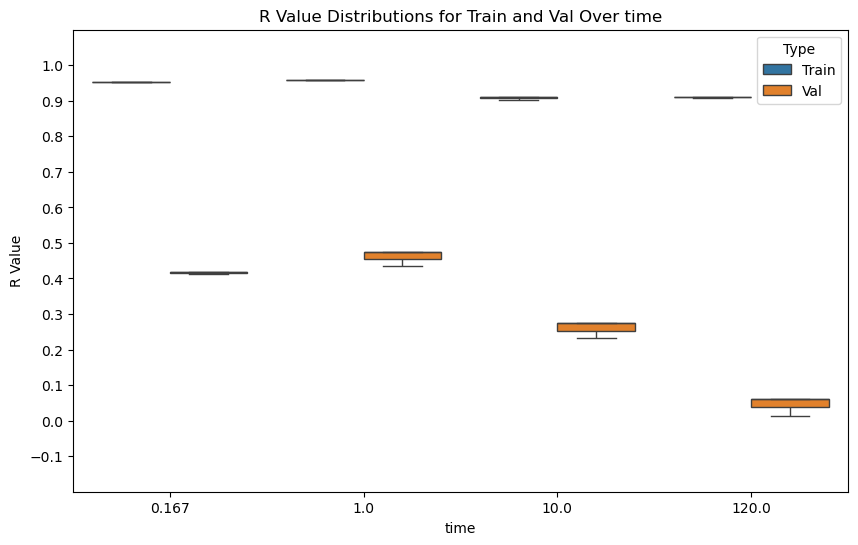

nan_df
        0.167       1.0      10.0  120.0  peptide             calc_name  \
0    0.225040  0.782720  1.000000    1.0        0  train_MD_Simulated_1   
1    0.050900  0.268610  0.956200    1.0        1  train_MD_Simulated_1   
2    0.064130  0.327600  0.981110    1.0        2  train_MD_Simulated_1   
3    0.596130  0.995610  1.000000    1.0        3  train_MD_Simulated_1   
4    0.999980  1.000000  1.000000    1.0        4  train_MD_Simulated_1   
..        ...       ...       ...    ...      ...                   ...   
241  0.406037  0.789994  0.999917    1.0       36    val_MD_Simulated_3   
242  0.838123  0.999422  1.000000    1.0       37    val_MD_Simulated_3   
243  0.999587  1.000000  1.000000    1.0       38    val_MD_Simulated_3   
244  0.746881  0.991541  1.000000    1.0       39    val_MD_Simulated_3   
245  0.466795  0.975941  1.000000    1.0       40    val_MD_Simulated_3   

     ResStr  ResEnd                                               path  
0       NaN     NaN

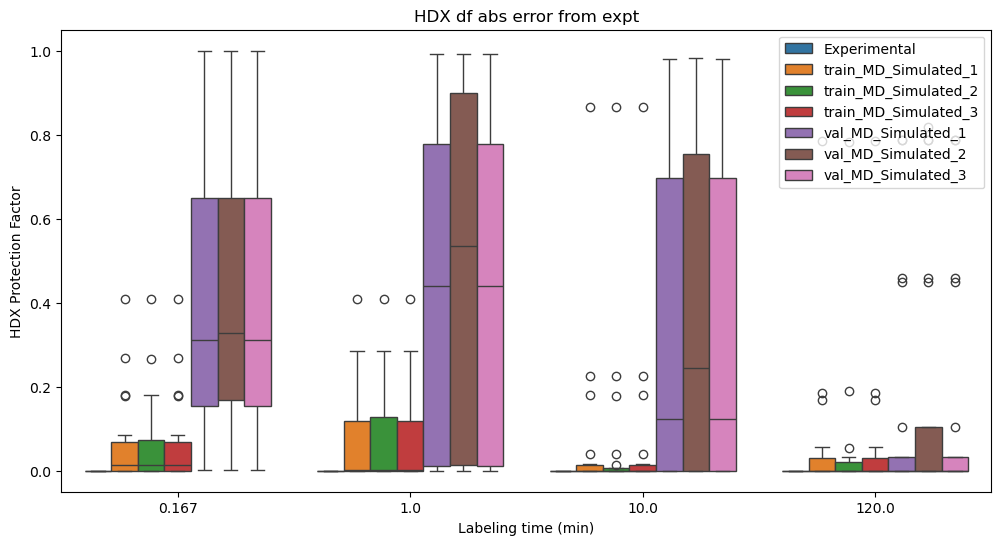

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.22504  0.78272  1.00000  1.00000        0  train_MD_Simulated_1   
1    0.05090  0.26861  0.95620  1.00000        1  train_MD_Simulated_1   
2    0.06413  0.32760  0.98111  1.00000        2  train_MD_Simulated_1   
3    0.59613  0.99561  1.00000  1.00000        3  train_MD_Simulated_1   
4    0.99998  1.00000  1.00000  1.00000        4  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
282  0.00963  0.05627  0.43963  0.99904       36          Experimental   
283  0.01757  0.10068  0.65396  1.00000       37          Experimental   
284  0.09888  0.46390  0.99804  1.00000       38          Experimental   
285  0.00650  0.03831  0.32339  0.99079       39          Experimental   
286  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

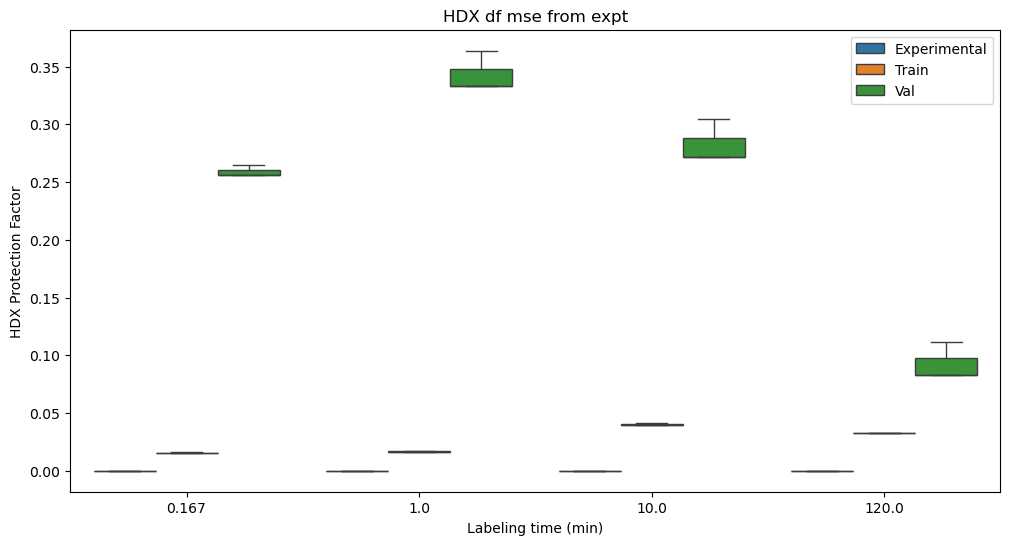

Saving experiment to:  logs/NC_Termini_s_BPTITtut0_1707957576.pkl


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
Experiment name RedundantK_R3_BPTITtut already exists. Attempting to change name to RedundantK_R3_BPTITtut0
Preparing HDX data for Experimental
Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4
                                                 HDX  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /Users/alexi/Library/CloudStorage/OneDrive-Nex...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False 

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:733: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/ValDX/Experiment_ABC.py:734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Proje

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_4x10^0/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_5x10^0

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_3x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_1/reweighting_gamma_2x10^0
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Contacts read
Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
         58928 function calls (58851 primitive calls) in 0.065 s

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/calc_hdx_train_MD_Simulated_2.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/out__train_MD_Simulated_2 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Proje

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_2x10^0
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_3x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_4x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_2/reweighting_gamma_5x10^0
Contacts read
Hbonds read
Segments and experimental dfracs read
Contacts read
Hbonds read
Segments and experimental dfracs read
         57119 function calls (57042 primitive calls) in 0.060 s

/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/universe.py:833: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/core/topologyattrs.py:293: DeprecationWarning: The bfactor topology attribute is only provided as an alias to the tempfactor attribute. It will be removed in 3.0. Please use the tempfactor attribute instead.
  warnings.warn(BFACTOR_WARNING, DeprecationWarning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1151: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/MDAnalysis/coordinates

Path to 'HDXER_ENV' environment: /Users/alexi/miniconda/envs/HDXER_ENV
python /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/calc_hdx.py -t /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/bpti_5pti_reimg_protonly_small.xtc -p /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_3/calc_hdx_train_MD_Simulated_3.log -out /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_3/out__train_MD_Simulated_3 -seg /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects

/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  

Path /Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_3/out__train_MD_Simulated_3Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_3/train_MD_Simulated_3_expt_dfracs.dat
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_3
/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/data/RedundantK_R3_BPTITtut0/train_MD_Simulated_3/out__train_MD_Simulated_3Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_3 with Exponent: 0
[{'do_reweight': False, 'do_params': True, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Proje

In [6]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode, system])

    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path


splits = ['r', 's', 'R3', 'xR', 'Sp', 'SR']
split_names = ['naiverandom', 'NC_Termini', 'RedundantK', 'XtureK', 'pINspace', 'spaceK']
system = 'BPTITtut'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


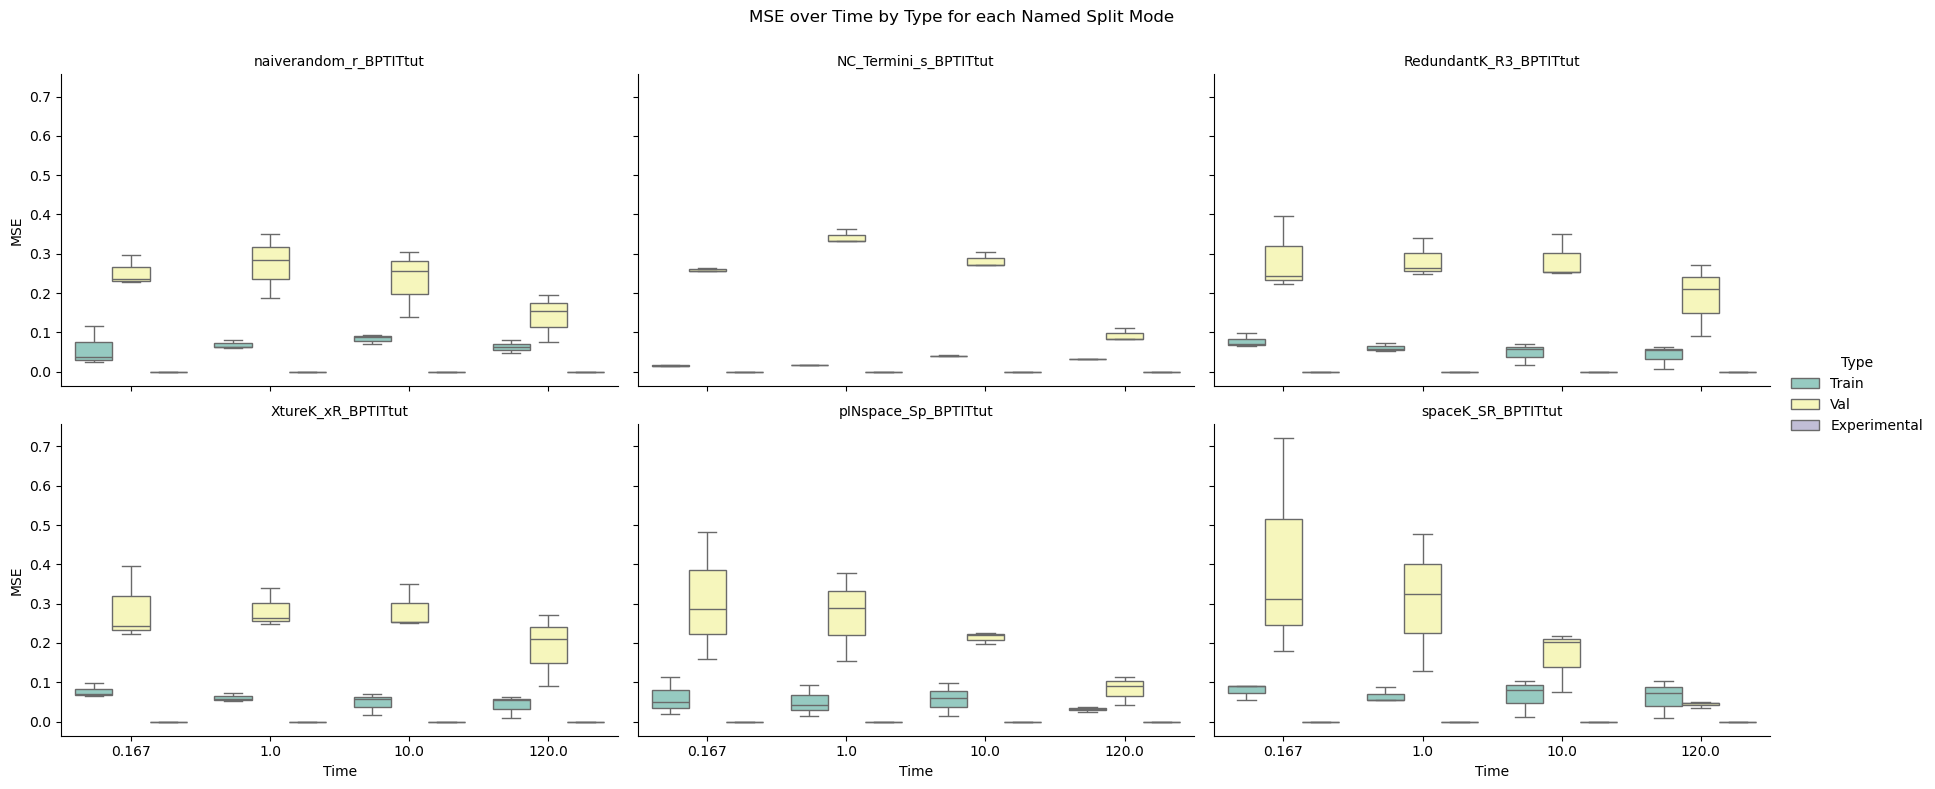

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alexi/miniconda/envs/HDXER_ENV/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


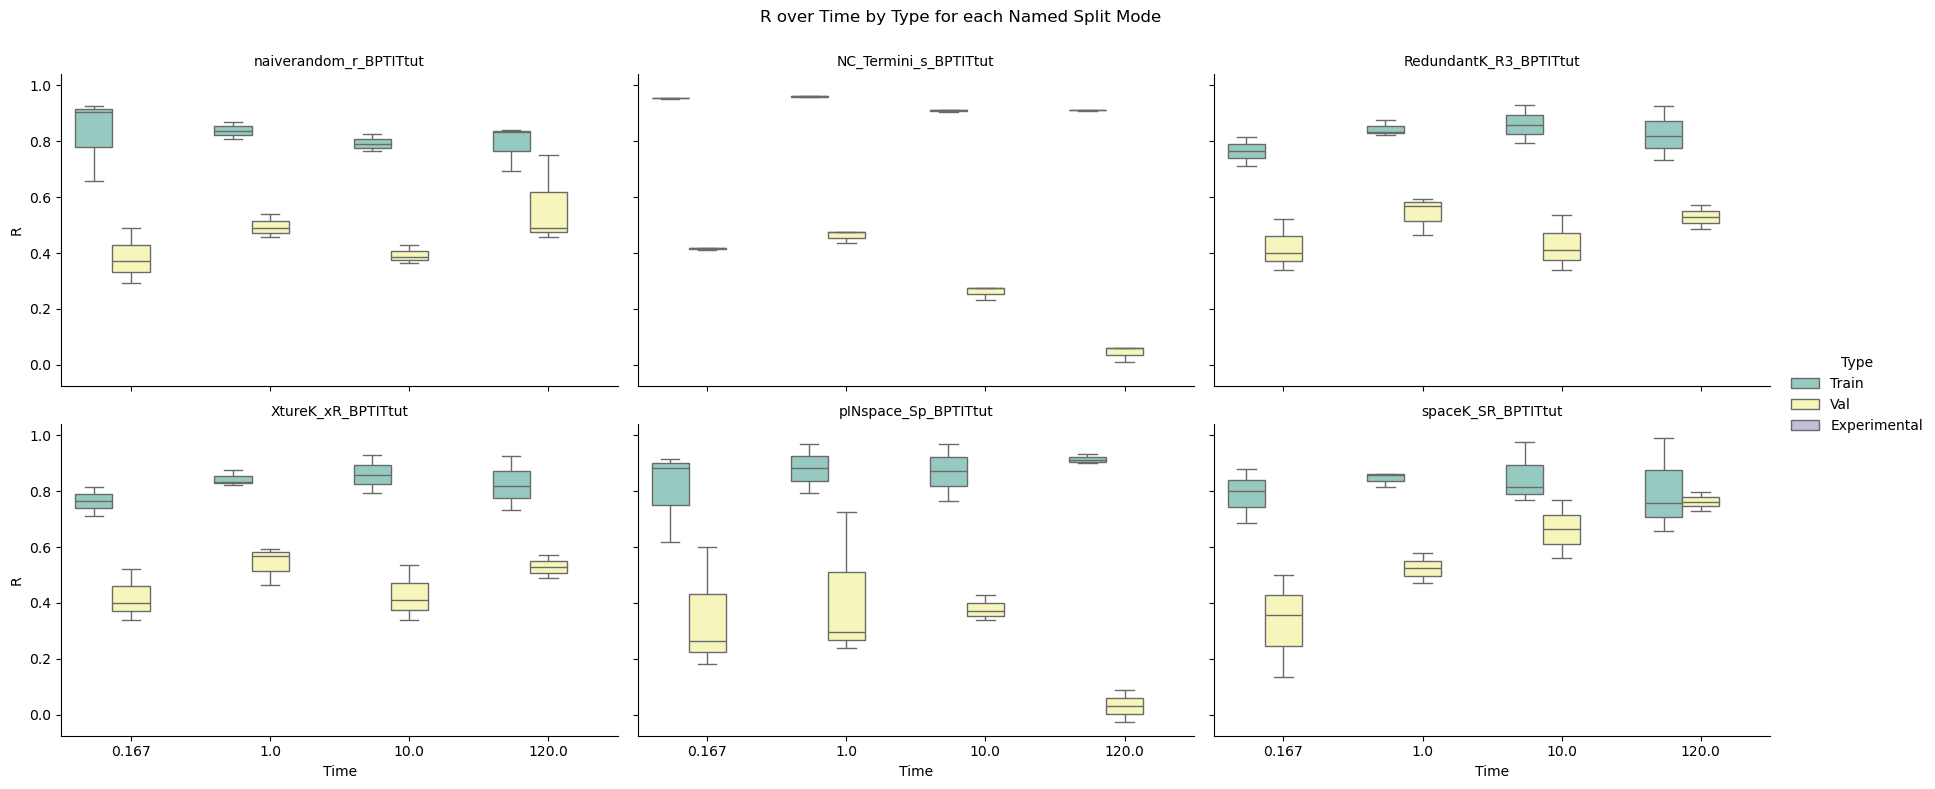

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                                LogPf  \
0   [3.0260393327359725, 5.523722591502172, 3.2181...   
1   [4.41, 8.05, 7.909999999999999, 4.97, 4.34, 4....   
2   [5.523722591502172, 5.4276578507803945, 3.4102...   
3   [3.0260393327359725, 5.523722591502172, 5.4276...   
4   [3.9846442824968493, 2.100015229964556, 2.3154...   
..                                                ...   
7   [4.9053583279463435, 8.954225519267135, 8.7984...   
8   [0.6174692767851946, 0.6451171548502032, 0.681...   
9   [4.41, 8.05, 7.909999999999999, 4.97, 4.34, 4....   
10  [0.5806054393651829, 1.059835325825334, 1.0414...   
11  [0.5806054393651829, 1.059835325825334, 1.0414...   

                   calc_name  \
0       train_MD_Simulated_1   
1   no_weight_MD_Simulated_1   
2         val_MD_Simulated_1   
3        test_MD_Simulated_1   
4       train_MD_Simulated_2   
..                       ...   
7        test_MD_Simulated_2   
8       train_MD_Simulated_3   
9   no_weight_MD_Simulated_

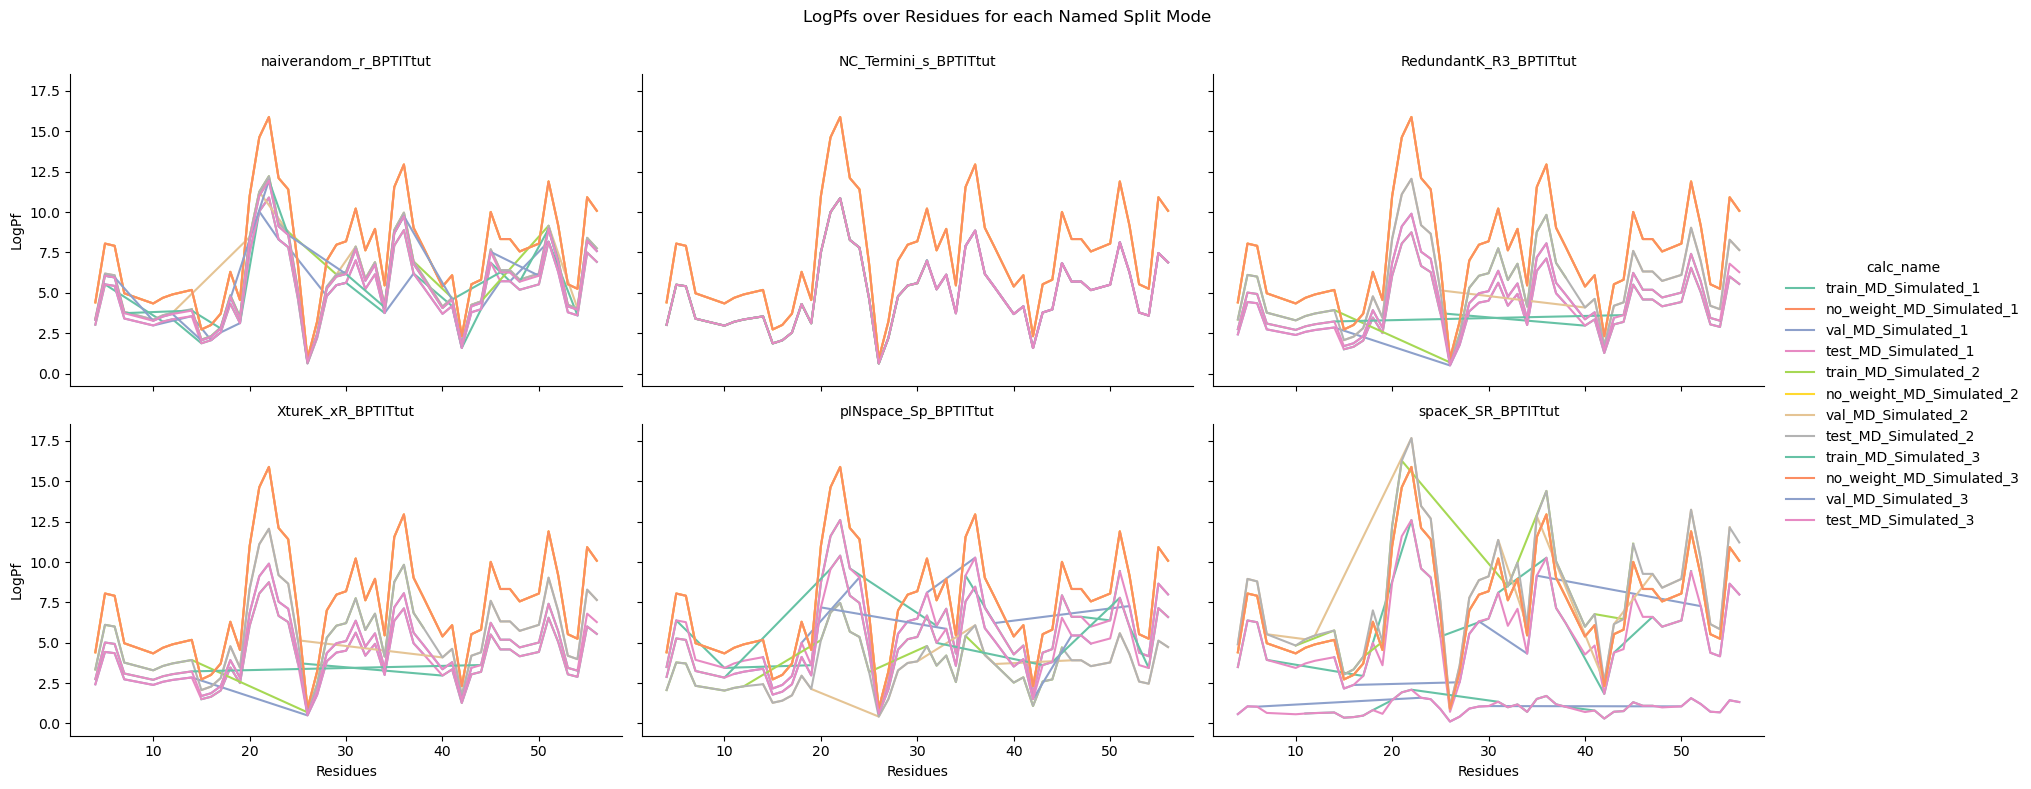

In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


         Bc         Bh             calc_name                    name
0  0.240162   4.535566  train_MD_Simulated_1  naiverandom_r_BPTITtut
1  0.269233   5.617564  train_MD_Simulated_2  naiverandom_r_BPTITtut
2  0.263418   4.353186  train_MD_Simulated_3  naiverandom_r_BPTITtut
0  0.239277   6.556569  train_MD_Simulated_1   NC_Termini_s_BPTITtut
1  0.239141   6.570756  train_MD_Simulated_2   NC_Termini_s_BPTITtut
2  0.239277   6.556569  train_MD_Simulated_3   NC_Termini_s_BPTITtut
0  0.192668   6.682539  train_MD_Simulated_1  RedundantK_R3_BPTITtut
1  0.265618   3.872181  train_MD_Simulated_2  RedundantK_R3_BPTITtut
2  0.218047   5.242251  train_MD_Simulated_3  RedundantK_R3_BPTITtut
0  0.192668   6.682539  train_MD_Simulated_1      XtureK_xR_BPTITtut
1  0.265618   3.872181  train_MD_Simulated_2      XtureK_xR_BPTITtut
2  0.218047   5.242251  train_MD_Simulated_3      XtureK_xR_BPTITtut
0  0.277614   3.428509  train_MD_Simulated_1    pINspace_Sp_BPTITtut
1  0.164388  11.674396  train_MD_S

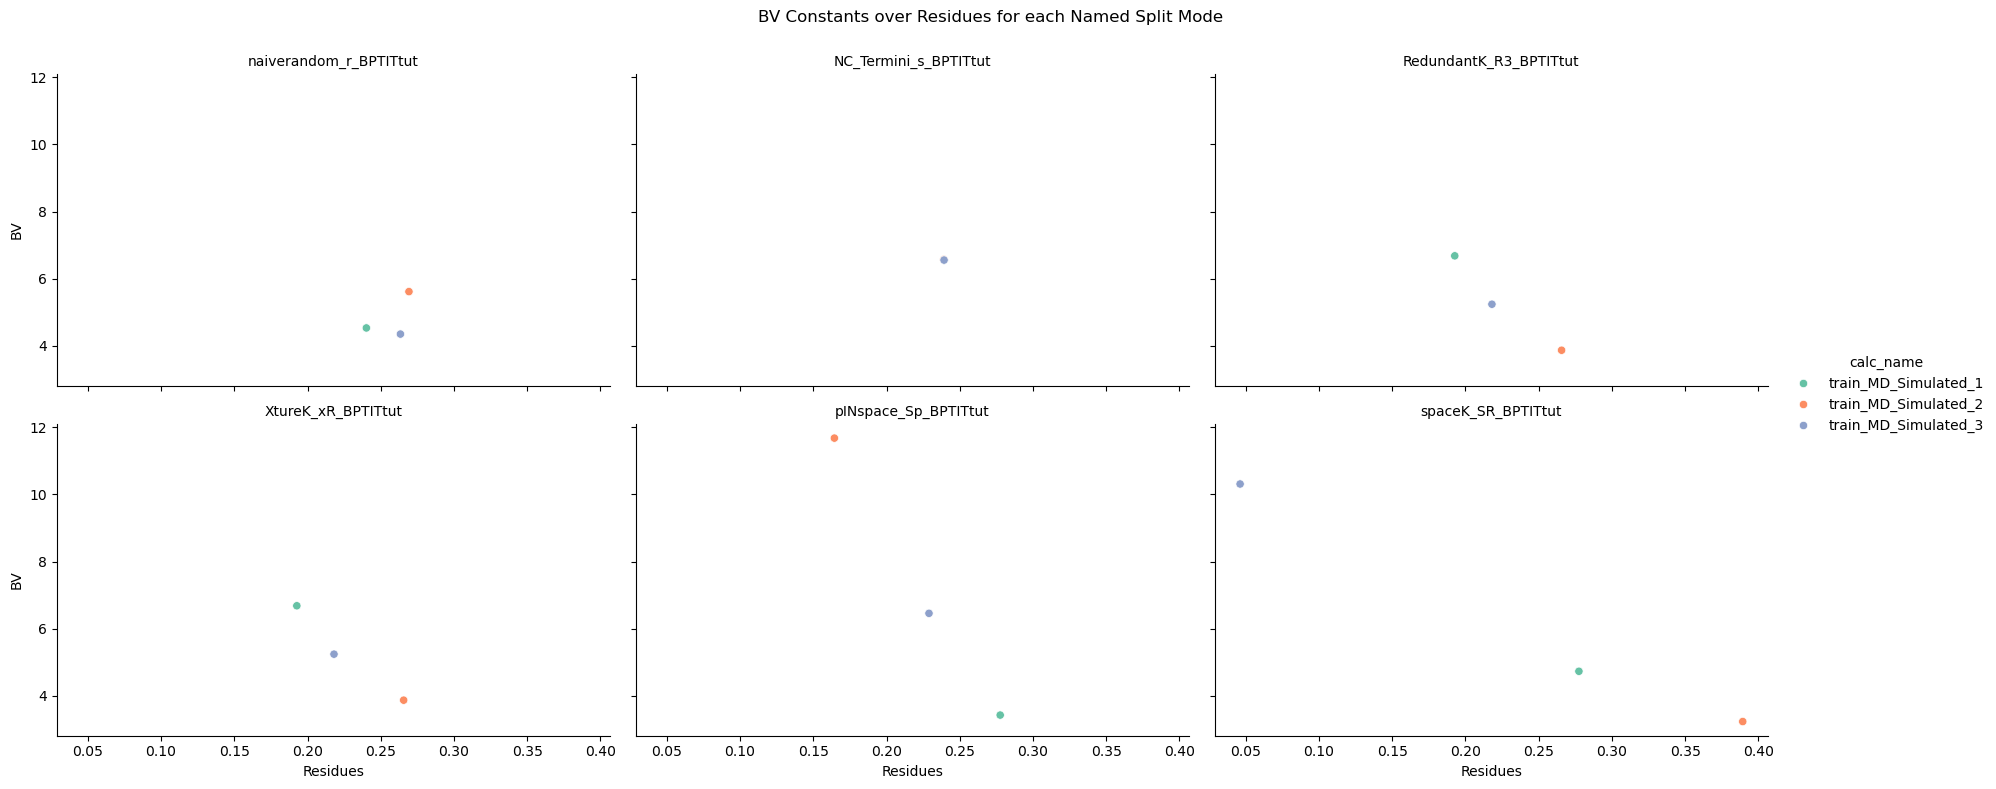

In [ ]:
# plot BV distributions 
# print(analysis_dumps["AvsB_S"]["BV_constants"])

BV_constants = pd.concat([analysis_dumps[i]["BV_constants"] for i in names])
num_names = len(BV_constants)/len(names)
BV_constants["name"] = [i for i in names for j in range(int(num_names))]
print(BV_constants)

# Create a FacetGrid, using 'name' for each subplot - plot as scatter plot
g = sns.FacetGrid(BV_constants, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('BV Constants over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.scatterplot, "Bc", "Bh", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "BV")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


         Bc         Bh             calc_name                    name
0  0.240162   4.535566  train_MD_Simulated_1  naiverandom_r_BPTITtut
1  0.269233   5.617564  train_MD_Simulated_2  naiverandom_r_BPTITtut
2  0.263418   4.353186  train_MD_Simulated_3  naiverandom_r_BPTITtut
0  0.239277   6.556569  train_MD_Simulated_1   NC_Termini_s_BPTITtut
1  0.239141   6.570756  train_MD_Simulated_2   NC_Termini_s_BPTITtut
2  0.239277   6.556569  train_MD_Simulated_3   NC_Termini_s_BPTITtut
0  0.192668   6.682539  train_MD_Simulated_1  RedundantK_R3_BPTITtut
1  0.265618   3.872181  train_MD_Simulated_2  RedundantK_R3_BPTITtut
2  0.218047   5.242251  train_MD_Simulated_3  RedundantK_R3_BPTITtut
0  0.192668   6.682539  train_MD_Simulated_1      XtureK_xR_BPTITtut
1  0.265618   3.872181  train_MD_Simulated_2      XtureK_xR_BPTITtut
2  0.218047   5.242251  train_MD_Simulated_3      XtureK_xR_BPTITtut
0  0.277614   3.428509  train_MD_Simulated_1    pINspace_Sp_BPTITtut
1  0.164388  11.674396  train_MD_S

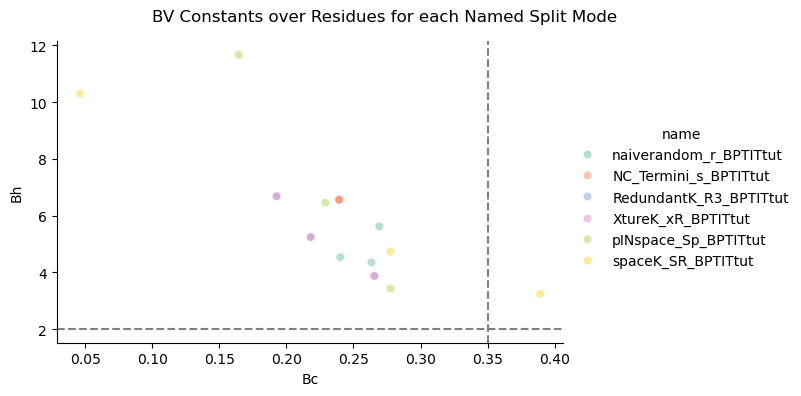

In [ ]:
# plot BV distributions 
bc, bh = 0.35, 2

BV_constants = pd.concat([analysis_dumps[i]["BV_constants"] for i in names])
num_names = len(BV_constants)/len(names)
BV_constants["name"] = [i for i in names for j in range(int(num_names))]
print(BV_constants)

# Create a FacetGrid with a single axis
g = sns.FacetGrid(BV_constants, height=4, aspect=1.5)
g.fig.suptitle('BV Constants over Residues for each Named Split Mode')

# Create scatter plot
g = g.map(sns.scatterplot, "Bc", "Bh", "name", palette="Set2", alpha=0.5)

# Adding dashed lines at bc and bh
plt.axhline(bh, color='grey', linestyle='dashed')
plt.axvline(bc, color='grey', linestyle='dashed')

# Adding some additional options for better visualization
g.add_legend(title='name')
g.set_axis_labels("Bc", "Bh")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

